In [1]:
#Step 1: Import Relevant Bits of File

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.graph_objects as go

#change this to make universal
print(os.getcwd())
my_directory = '/Users/Apara/Documents/GitHub/hsl_python/SpaceVestibExperiment' 
folder = 'Aw1' #change this based on person



/Users/apara/Documents/GitHub/hsl_python/SpaceVestibExperiment


In [2]:
def import_vantan(rootdir, foldername):

    directory = rootdir + '/' + foldername + '/VANTAN' 

    os.chdir(directory)

    for r, d, files in os.walk(directory):
        for filename in files:
            if "VAN" in filename:
                #Naming Convention Loop
                if 'si' in filename and 'up' in filename:
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    si_up_VAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        si_up_VAN.append(float(vantan_list[5]))
                elif 'si' in filename and 'p' in filename:
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    si_p_VAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        si_p_VAN.append(float(vantan_list[5]))
                elif 'st' in filename and 'up' in filename: 
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    st_up_VAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        st_up_VAN.append(float(vantan_list[5]))
                elif 'st' in filename and 'p' in filename: 
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    st_p_VAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        st_p_VAN.append(float(vantan_list[5]))
            elif "TAN" in filename: 
                if 'si' in filename and 'up' in filename:
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    si_up_TAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        si_up_TAN.append(float(vantan_list[6]))
                elif 'si' in filename and 'p' in filename:
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    si_p_TAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        si_p_TAN.append(float(vantan_list[6]))
                elif 'st' in filename and 'up' in filename: 
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    st_up_TAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        st_up_TAN.append(float(vantan_list[6]))
                elif 'st' in filename and 'p' in filename: 
                    f = open(filename, "r+")
                    content = f.readlines()[4:]
                    f.close()
                    st_p_TAN = []
                    for l in content:
                        vantan_list = list(l.split())    
                        st_p_TAN.append(float(vantan_list[6]))
    vantan_array = np.array([si_up_VAN, si_p_VAN, st_up_VAN, st_p_VAN, si_up_TAN, si_p_TAN, st_up_TAN, st_p_TAN])
    return vantan_array

vantan_array = import_vantan(my_directory, folder)


In [3]:
def vantan_analysis_feats(vt_arr):
    
    means_abs = []
    std = [];
    pos_neg_diff = [];# (# of positive nums) - (#of negative nums)
    
    #mean_abs
    for run in vt_arr:
        means_abs.append(np.mean(abs(run)))
    #change the p runs to be (mean of p runs) - (mean of up runs)
    #for i in [1,3,5,7]:
        #means_abs[i] = (means_abs[i]-means_abs[i-1])
    
    #standard deviation
    for run in vt_arr:
        std.append(np.std(run))
        
    #positive/negative difference
    for run in vt_arr:  
        pos = [];
        neg = [];
        for ind in run:
            if ind > 0:
                pos.append(ind)
            elif ind < 0:
                neg.append(ind)
        pos_neg_diff.append(len(pos)-len(neg))
    return means_abs, std

vt_stats = (vantan_analysis_feats(vantan_array))
print(vt_stats)

([28.849999999999998, 14.5, 32.47777777777778, 23.766666666666666, 0.6222222222222222, 1.7277777777777779, 0.7388888888888889, 1.261111111111111], [19.663481380467704, 13.416035181826262, 6.332768005957894, 7.84743411709982, 0.6516834799384524, 0.8173466556826152, 0.31996334666626514, 0.4668319813010159])


In [4]:
df_VAN = pd.DataFrame({"Position":["Sitting", "Standing"], 
                   "mean_up":[vt_stats[0][0], vt_stats[0][1]],
                    "mean_p": [vt_stats[0][2], vt_stats[0][3]],
                   "sd_up":[vt_stats[1][0],vt_stats[1][1]],
                    "sd_p":[vt_stats[1][2],vt_stats[1][3]]})

df_TAN = pd.DataFrame({"Position":["Sitting", "Standing"], 
                   "mean_up":[vt_stats[0][4], vt_stats[0][5]],
                    "mean_p": [vt_stats[0][6], vt_stats[0][7]],
                   "sd_up":[vt_stats[1][4],vt_stats[1][5]],
                    "sd_p":[vt_stats[1][6],vt_stats[1][7]]})
print(df_VAN)

   Position  mean_up     mean_p      sd_up      sd_p
0   Sitting    28.85  32.477778  19.663481  6.332768
1  Standing    14.50  23.766667  13.416035  7.847434


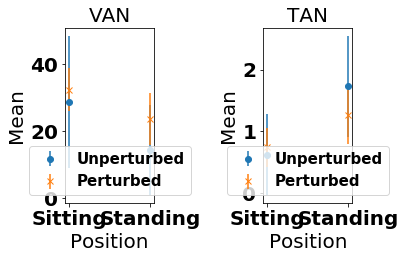

In [77]:
plt.subplot(1,2,1)
plt.errorbar(np.arange(len(df_VAN['Position'])), df_VAN['mean_up'], yerr=df_VAN['sd_up'], ls='None', marker='o')
plt.errorbar(np.arange(len(df_VAN['Position'])), df_VAN['mean_p'], yerr=df_VAN['sd_p'], ls='None', marker='x')
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(len(df_VAN['Position'])))
ax.xaxis.set_ticklabels(df_VAN['Position'], )
plt.xlabel("Position")
plt.ylabel("Mean")
plt.title('VAN')
plt.legend(['Unperturbed', 'Perturbed'], loc = 'lower center')

plt.subplot(1,2,2)
plt.errorbar(np.arange(len(df_TAN['Position'])), df_TAN['mean_up'], yerr=df_TAN['sd_up'], ls='None', marker='o')
plt.errorbar(np.arange(len(df_TAN['Position'])), df_TAN['mean_p'], yerr=df_TAN['sd_p'], ls='None', marker='x')
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(len(df_TAN['Position'])))
ax.xaxis.set_ticklabels(df_TAN['Position'], )
plt.xlabel("Position")
plt.ylabel("Mean")
plt.tight_layout()
plt.title('TAN')
plt.legend(['Unperturbed', 'Perturbed'], loc = 'lower center')

plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('legend', fontsize = 12)


plt.show()


In [6]:
# [si_up_VAN, si_p_VAN, st_up_VAN, st_p_VAN, si_up_TAN, si_p_TAN, st_up_TAN, st_p_TAN]
# [0,1,2,3,4,5,6,7]

# 2 different kinds of comparisons:
    # up v p under same condition
    # standing v sitting under same perturbation
    # extremes (si_up & st_p)

# tests: t-test (parametric assumption), Mann-Whitney (non-param), Kruskal Wallis(non-param)
def stats_for_vantan(vt_arr):
   
    # t-test:
    # unperturbed versus perturbed:
    upvp_si_VAN = stats.ttest_ind(vt_arr[0],vt_arr[1])
    upvp_st_VAN = stats.ttest_ind(vt_arr[2],vt_arr[3])
    upvp_si_TAN = stats.ttest_ind(vt_arr[4],vt_arr[5])
    upvp_st_TAN = stats.ttest_ind(vt_arr[6],vt_arr[7])
    
    #standing versus sitting
    sivst_up_VAN = stats.ttest_ind(vt_arr[0],vt_arr[2])
    sivst_p_VAN = stats.ttest_ind(vt_arr[1],vt_arr[3]) 
    sivst_up_TAN = stats.ttest_ind(vt_arr[4],vt_arr[6])
    sivst_p_TAN = stats.ttest_ind(vt_arr[5],vt_arr[7])
    
    #extremes comparison
    siup_v_stp_VAN = stats.ttest_ind(vt_arr[0],vt_arr[3])
    siup_v_stp_TAN = stats.ttest_ind(vt_arr[4],vt_arr[7])
    
    #ttestarrVAN = np.array([upvp_si_VAN,upvp_st_VAN,sivst_up_VAN,sivst_p_VAN,siup_v_stp_VAN])
    #ttestarrTAN = np.array([upvp_si_TAN,upvp_st_TAN,sivst_up_TAN,sivst_p_TAN,siup_v_stp_TAN])
    #ttestarr = np.array([ttestarrVAN,ttestarrTAN])
    ttestarr = np.array([upvp_si_VAN,upvp_si_TAN,upvp_st_VAN,upvp_st_TAN,sivst_up_VAN,sivst_up_TAN,sivst_p_VAN,sivst_p_TAN,siup_v_stp_VAN,siup_v_stp_TAN])
    
    # Mann-Whitney U test:
    # unperturbed versus perturbed:
    upvp_si_VANmw = stats.mannwhitneyu(vt_arr[0],vt_arr[1])
    upvp_st_VANmw = stats.mannwhitneyu(vt_arr[2],vt_arr[3])
    upvp_si_TANmw = stats.mannwhitneyu(vt_arr[4],vt_arr[5])
    upvp_st_TANmw = stats.mannwhitneyu(vt_arr[6],vt_arr[7])
    
    #standing versus sitting
    sivst_up_VANmw = stats.mannwhitneyu(vt_arr[0],vt_arr[2])
    sivst_p_VANmw = stats.mannwhitneyu(vt_arr[1],vt_arr[3]) 
    sivst_up_TANmw = stats.mannwhitneyu(vt_arr[4],vt_arr[6])
    sivst_p_TANmw = stats.mannwhitneyu(vt_arr[5],vt_arr[7])
    
    #extremes comparison
    siup_v_stp_VANmw = stats.mannwhitneyu(vt_arr[0],vt_arr[3])
    siup_v_stp_TANmw = stats.mannwhitneyu(vt_arr[4],vt_arr[7])
    
    #mannwhitneyarrVAN = np.array([upvp_si_VANmw,upvp_st_VANmw,sivst_up_VANmw,sivst_p_VANmw,siup_v_stp_VANmw])
    #mannwhitneyarrTAN = np.array([upvp_si_TANmw,upvp_st_TANmw,sivst_up_TANmw,sivst_p_TANmw,siup_v_stp_TANmw])
    #mannwhitneyarr = np.array([mannwhitneyarrVAN,mannwhitneyarrTAN])
    mannwhitneyarr = np.array([upvp_si_VANmw,upvp_si_TANmw,upvp_st_VANmw,upvp_st_TANmw,sivst_up_VANmw,sivst_up_TANmw,sivst_p_VANmw,sivst_p_TANmw,siup_v_stp_VANmw,siup_v_stp_TANmw])
    
    # Kruskal Wallis test:
    # unperturbed versus perturbed:
    upvp_si_VANk = stats.kruskal(vt_arr[0],vt_arr[1])
    upvp_st_VANk = stats.kruskal(vt_arr[2],vt_arr[3])
    upvp_si_TANk = stats.kruskal(vt_arr[4],vt_arr[5])
    upvp_st_TANk = stats.kruskal(vt_arr[6],vt_arr[7])
    
    #standing versus sitting
    sivst_up_VANk = stats.kruskal(vt_arr[0],vt_arr[2])
    sivst_p_VANk = stats.kruskal(vt_arr[1],vt_arr[3]) 
    sivst_up_TANk = stats.kruskal(vt_arr[4],vt_arr[6])
    sivst_p_TANk = stats.kruskal(vt_arr[5],vt_arr[7])
    
    #extremes comparison
    siup_v_stp_VANk = stats.kruskal(vt_arr[0],vt_arr[3])
    siup_v_stp_TANk = stats.kruskal(vt_arr[4],vt_arr[7])
    
    #kruskalwallisarrVAN = np.array([upvp_si_VANk,upvp_st_VANk,sivst_up_VANk,sivst_p_VANk,siup_v_stp_VANk])
    #kruskalwallisarrTAN = np.array([upvp_si_TANk,upvp_st_TANk,sivst_up_TANk,sivst_p_TANk,siup_v_stp_TANk])
    #kruskalwallisarr = np.array([kruskalwallisarrVAN,kruskalwallisarrTAN])
    kruskalwallisarr = np.array([upvp_si_VANk,upvp_si_TANk,upvp_st_VANk,upvp_st_TANk,sivst_up_VANk,sivst_up_TANk,sivst_p_VANk,sivst_p_TANk,siup_v_stp_VANk,siup_v_stp_TANk])
   

    #Wilcoxon signed-rank test 
    # unperturbed versus perturbed:
    upvp_si_VANw = stats.wilcoxon(vt_arr[0],vt_arr[1])
    upvp_st_VANw = stats.wilcoxon(vt_arr[2],vt_arr[3])
    upvp_si_TANw = stats.wilcoxon(vt_arr[4],vt_arr[5])
    upvp_st_TANw = stats.wilcoxon(vt_arr[6],vt_arr[7])
    
    #standing versus sitting
    sivst_up_VANw = stats.wilcoxon(vt_arr[0],vt_arr[2])
    sivst_p_VANw = stats.wilcoxon(vt_arr[1],vt_arr[3]) 
    sivst_up_TANw = stats.wilcoxon(vt_arr[4],vt_arr[6])
    sivst_p_TANw = stats.wilcoxon(vt_arr[5],vt_arr[7])
    
    #extremes comparison
    siup_v_stp_VANw = stats.wilcoxon(vt_arr[0],vt_arr[3])
    siup_v_stp_TANw = stats.wilcoxon(vt_arr[4],vt_arr[7])
    
    #wilcoxonarrVAN = np.array([upvp_si_VANw,upvp_st_VANw,sivst_up_VANw,sivst_p_VANw,siup_v_stp_VANw])
    #wilcoxonarrTAN = np.array([upvp_si_TANw,upvp_st_TANw,sivst_up_TANw,sivst_p_TANw,siup_v_stp_TANw])
    #wilcoxonarr = np.array([wilcoxonarrVAN,wilcoxonarrTAN])
    wilcoxonarr = np.array([upvp_si_VANw,upvp_si_TANw,upvp_st_VANw,upvp_st_TANw,sivst_up_VANw,sivst_up_TANw,sivst_p_VANw,sivst_p_TANw,siup_v_stp_VANw,siup_v_stp_TANw])
    
    return ttestarr, mannwhitneyarr, kruskalwallisarr, wilcoxonarr


In [67]:
def producethisdamnimage(vantan_array):
    s1_statisticsarr = stats_for_vantan(vantan_array)

    for i in range(len(s1_statisticsarr)):
        for j in range(len(s1_statisticsarr[i])):
            for k in range(2):
                s1_statisticsarr[i][j][k] = "%.2e"%(s1_statisticsarr[i][j][k])
    fig = go.Figure(data=[go.Table(
        columnorder = [1,2,3,4,5],
        columnwidth = [400,500],
        header=dict(values=['Comparison', 'T-test', 'Mann-Whitney U', 'Kruskal Wallis', 'Wilcoxon'],
                    align='left'),
        cells=dict(values=[['UP vs. P: SI (VAN)', 'UP vs. P: SI (TAN)','UP vs. P: ST (VAN)', 'UP vs. P: ST (TAN)', 'SI vs. ST: UP (VAN)','SI vs. ST: UP (TAN)', 'SI vs. ST: P (VAN)','SI vs. ST: P (TAN)', 'UP SI vs. P ST (VAN)', 'UP SI vs. P ST (TAN)'], # 1st column
                           [s1_statisticsarr[0][0][1], s1_statisticsarr[0][1][1], s1_statisticsarr[0][2][1], s1_statisticsarr[0][3][1], s1_statisticsarr[0][4][1], s1_statisticsarr[0][5][1], s1_statisticsarr[0][6][1], s1_statisticsarr[0][7][1], s1_statisticsarr[0][8][1], s1_statisticsarr[0][9][1]],
                           [s1_statisticsarr[1][0][1], s1_statisticsarr[1][1][1], s1_statisticsarr[1][2][1], s1_statisticsarr[1][3][1], s1_statisticsarr[1][4][1], s1_statisticsarr[1][5][1], s1_statisticsarr[1][6][1], s1_statisticsarr[1][7][1], s1_statisticsarr[1][8][1], s1_statisticsarr[1][9][1]],
                           [s1_statisticsarr[2][0][1], s1_statisticsarr[2][1][1], s1_statisticsarr[2][2][1], s1_statisticsarr[2][3][1], s1_statisticsarr[2][4][1], s1_statisticsarr[2][5][1], s1_statisticsarr[2][6][1], s1_statisticsarr[2][7][1], s1_statisticsarr[2][8][1], s1_statisticsarr[2][9][1]],
                           [s1_statisticsarr[3][0][1], s1_statisticsarr[3][1][1], s1_statisticsarr[3][2][1], s1_statisticsarr[3][3][1], s1_statisticsarr[3][4][1], s1_statisticsarr[3][5][1], s1_statisticsarr[3][6][1], s1_statisticsarr[3][7][1], s1_statisticsarr[3][8][1], s1_statisticsarr[3][9][1]]], 
                   align='left'))])

    fig.layout.width=1000
    headerColor = 'grey'
    rowEvenColor = 'lightgrey'
    rowOddColor = 'white'

    return fig

for i in ['Ak1', 'st1', 'Aw1', "Ma1"]:
    vantan_array = import_vantan(my_directory, i)
    fig = producethisdamnimage(vantan_array)
    fig.show()

(6.648330117092839, 1.255002027998531)